# prepare

In [1]:
import treeple
from treeple import ObliqueRandomForestClassifier
from sklearn.model_selection import train_test_split
from treeple.datasets import make_trunk_classification
import cProfile
import pstats
import io

In [2]:
# Shared hyperparameters that used for both models
MAX_DEPTH = 10
N_ESTIMATORS = 10
RANDOM_SEED = 42
N_JOBS=-1
BOOTSTRAP = True
MAX_FEATURE = 3000
FEATURE_COMBINATIONS = 1000.0

params_treeple = {}
params_treeple["n_estimators"] = int(N_ESTIMATORS)
params_treeple["criterion"] = "entropy"
params_treeple["max_depth"] = MAX_DEPTH
params_treeple["min_samples_split"] = 2
params_treeple["min_samples_leaf"] = 1
params_treeple["min_weight_fraction_leaf"] = 0.0
params_treeple["max_features"] = MAX_FEATURE
params_treeple["max_leaf_nodes"] = 30
params_treeple["min_impurity_decrease"] = 0.0
params_treeple["bootstrap"] = BOOTSTRAP
params_treeple["oob_score"] = False
params_treeple["n_jobs"] = N_JOBS
params_treeple["random_state"] = RANDOM_SEED
params_treeple["verbose"] = 0
params_treeple["warm_start"] = False
params_treeple["class_weight"] = None
params_treeple["max_samples"] = None
params_treeple["feature_combinations"] = FEATURE_COMBINATIONS
#params_treeple["verbose"] = 100


In [3]:
X, y = make_trunk_classification(n_samples=1000, n_dim=1000)

yesssss


# profile function

In [5]:

def profiling_fit(n_estimators, n_dim, n_samples, max_features, feature_combinations, max_depth, n_jobs, max_leaf_nodes, treeple_params=None):
    X, y = make_trunk_classification(n_samples=n_samples, n_dim=n_dim)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    if treeple_params is None:
        params = {
            "n_estimators": n_estimators,
            "max_depth": max_depth,
            "max_features": max_features,
            "feature_combinations": feature_combinations,
            "n_jobs": n_jobs,
            "max_leaf_nodes": max_leaf_nodes
        }
    else:
        params = treeple_params.copy()
        params.update({
            "n_estimators": n_estimators,
            "max_depth": max_depth,
            "max_features": max_features,
            "feature_combinations": feature_combinations,
            "n_jobs": n_jobs,
            "max_leaf_nodes": max_leaf_nodes,
        })

    model = ObliqueRandomForestClassifier(**params)

    
    profiler = cProfile.Profile()
    profiler.enable()

    model.fit(X_train, y_train)

    profiler.disable()

    s = io.StringIO()
    ps = pstats.Stats(profiler, stream=s)#.sort_stats('tottime')
    ps.print_stats()

    return s.getvalue()


# profile results

In [6]:
report = profiling_fit(
    n_estimators=1,
    n_dim=1000,
    n_samples=2000,
    max_features=1000,
    feature_combinations=1000.0,
    max_depth=10,
    n_jobs=-1,
    max_leaf_nodes=30,
    treeple_params=params_treeple
)
print(report)

         7128 function calls (7066 primitive calls) in 4.372 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      434    4.364    0.010    4.364    0.010 {built-in method time.sleep}
       82    0.001    0.000    0.001    0.000 {method 'acquire' of '_thread.lock' objects}
        1    0.001    0.001    4.366    4.366 /home/clark/anaconda3/envs/treeple/lib/python3.11/site-packages/joblib/parallel.py:1746(_retrieve)
       10    0.001    0.000    0.001    0.000 {built-in method numpy.asarray}
       19    0.000    0.000    0.000    0.000 {built-in method _thread.start_new_thread}
      435    0.000    0.000    0.000    0.000 /home/clark/anaconda3/envs/treeple/lib/python3.11/site-packages/joblib/parallel.py:1719(_wait_retrieval)
        3    0.000    0.000    0.000    0.000 {method 'reduce' of 'numpy.ufunc' objects}
      482    0.000    0.000    0.000    0.000 {built-in method builtins.len}
        6    0.000    0.000    0.

In [7]:
report = profiling_fit(
    n_estimators=1,
    n_dim=2048,
    n_samples=1600,
    max_features=2048,
    feature_combinations=64.0,
    max_depth=10,
    n_jobs=-1,
    max_leaf_nodes=30,
    treeple_params=params_treeple
)
print(report)

         6032 function calls (5989 primitive calls) in 2.882 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      286    2.876    0.010    2.876    0.010 {built-in method time.sleep}
        1    0.001    0.001    2.877    2.877 /home/clark/anaconda3/envs/treeple/lib/python3.11/site-packages/joblib/parallel.py:1746(_retrieve)
       10    0.001    0.000    0.001    0.000 {built-in method numpy.asarray}
       82    0.001    0.000    0.001    0.000 {method 'acquire' of '_thread.lock' objects}
        3    0.000    0.000    0.000    0.000 {method 'reduce' of 'numpy.ufunc' objects}
       19    0.000    0.000    0.000    0.000 {built-in method _thread.start_new_thread}
      287    0.000    0.000    0.000    0.000 /home/clark/anaconda3/envs/treeple/lib/python3.11/site-packages/joblib/parallel.py:1719(_wait_retrieval)
      326    0.000    0.000    0.000    0.000 {built-in method builtins.len}
       99    0.000    0.000    0.

In [8]:
report200 = profiling_fit(
    n_estimators=200,
    n_dim=2048,
    n_samples=1600,
    max_features=2048,
    feature_combinations=64.0,
    max_depth=10,
    n_jobs=-1,
    max_leaf_nodes=30,
    treeple_params=params_treeple
)
print(report200)

         383123 function calls (377079 primitive calls) in 96.514 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
     9524   96.243    0.010   96.243    0.010 {built-in method time.sleep}
      200    0.153    0.001   96.445    0.482 /home/clark/anaconda3/envs/treeple/lib/python3.11/site-packages/joblib/parallel.py:1746(_retrieve)
     9724    0.026    0.000    0.026    0.000 /home/clark/anaconda3/envs/treeple/lib/python3.11/site-packages/joblib/parallel.py:1719(_wait_retrieval)
     9922    0.013    0.000    0.013    0.000 {built-in method builtins.len}
    16019    0.010    0.000    0.018    0.000 /home/clark/anaconda3/envs/treeple/lib/python3.11/inspect.py:2669(__init__)
     1001    0.010    0.000    0.037    0.000 /home/clark/anaconda3/envs/treeple/lib/python3.11/inspect.py:2331(_signature_from_function)
     9723    0.010    0.000    0.010    0.000 /home/clark/anaconda3/envs/treeple/lib/python3.11/site-packages/jobli

In [9]:
with open("experiments/result/cython_profile_reports/profile_report.txt", "w") as file:
    file.write(report)

In [10]:
report_njobs1 = profiling_fit(
    n_estimators=10,
    n_dim=2048,
    n_samples=1600,
    max_features=2048,
    feature_combinations=64.0,
    max_depth=10,
    n_jobs=1,
    max_leaf_nodes=30,
    treeple_params=params_treeple
)
print(report_njobs1)

         25002 function calls (24676 primitive calls) in 28.330 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       10   28.316    2.832   28.316    2.832 /home/clark/anaconda3/envs/treeple/lib/python3.11/site-packages/treeple/tree/_classes.py:883(_build_tree)
       10    0.002    0.000   28.322    2.832 /home/clark/anaconda3/envs/treeple/lib/python3.11/site-packages/treeple/_lib/sklearn/tree/_classes.py:233(_fit)
       31    0.001    0.000    0.002    0.000 /home/clark/anaconda3/envs/treeple/lib/python3.11/site-packages/sklearn/utils/validation.py:1490(check_random_state)
       21    0.001    0.000    0.001    0.000 /home/clark/anaconda3/envs/treeple/lib/python3.11/site-packages/numpy/_core/_ufunc_config.py:464(inner)
       51    0.001    0.000    0.002    0.000 /home/clark/anaconda3/envs/treeple/lib/python3.11/inspect.py:2331(_signature_from_function)
       63    0.001    0.000    0.001    0.000 {method 'reduce' o

In [11]:
report_njobs1 = profiling_fit(
    n_estimators=10,
    n_dim=2048,
    n_samples=1600,
    max_features=2048,
    feature_combinations=64.0,
    max_depth=10,
    n_jobs=1,
    max_leaf_nodes=30,
    treeple_params=params_treeple
)
print(report_njobs1)

         25002 function calls (24676 primitive calls) in 28.674 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       10   28.660    2.866   28.660    2.866 /home/clark/anaconda3/envs/treeple/lib/python3.11/site-packages/treeple/tree/_classes.py:883(_build_tree)
       10    0.002    0.000   28.666    2.867 /home/clark/anaconda3/envs/treeple/lib/python3.11/site-packages/treeple/_lib/sklearn/tree/_classes.py:233(_fit)
       31    0.001    0.000    0.002    0.000 /home/clark/anaconda3/envs/treeple/lib/python3.11/site-packages/sklearn/utils/validation.py:1490(check_random_state)
       21    0.001    0.000    0.001    0.000 /home/clark/anaconda3/envs/treeple/lib/python3.11/site-packages/numpy/_core/_ufunc_config.py:464(inner)
       80    0.001    0.000    0.001    0.000 {built-in method numpy.asarray}
       63    0.001    0.000    0.001    0.000 {method 'reduce' of 'numpy.ufunc' objects}
       51    0.001    0.000    0.00

In [12]:
report_njobs1 = profiling_fit(
    n_estimators=10,
    n_dim=2048,
    n_samples=1600,
    max_features=2048,
    feature_combinations=64.0,
    max_depth=10,
    n_jobs=1,
    max_leaf_nodes=30,
    treeple_params=params_treeple
)
print(report_njobs1)

         25002 function calls (24676 primitive calls) in 29.114 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       10   29.100    2.910   29.100    2.910 /home/clark/anaconda3/envs/treeple/lib/python3.11/site-packages/treeple/tree/_classes.py:883(_build_tree)
       10    0.002    0.000   29.106    2.911 /home/clark/anaconda3/envs/treeple/lib/python3.11/site-packages/treeple/_lib/sklearn/tree/_classes.py:233(_fit)
       31    0.001    0.000    0.002    0.000 /home/clark/anaconda3/envs/treeple/lib/python3.11/site-packages/sklearn/utils/validation.py:1490(check_random_state)
       21    0.001    0.000    0.001    0.000 /home/clark/anaconda3/envs/treeple/lib/python3.11/site-packages/numpy/_core/_ufunc_config.py:464(inner)
       63    0.001    0.000    0.001    0.000 {method 'reduce' of 'numpy.ufunc' objects}
      819    0.001    0.000    0.001    0.000 /home/clark/anaconda3/envs/treeple/lib/python3.11/inspect.py:2669(_

In [13]:
report_njobs1 = profiling_fit(
    n_estimators=10,
    n_dim=2048,
    n_samples=1600,
    max_features=2048,
    feature_combinations=2.0,
    max_depth=10,
    n_jobs=1,
    max_leaf_nodes=30,
    treeple_params=params_treeple
)
print(report_njobs1)

         25002 function calls (24676 primitive calls) in 11.945 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       10   11.932    1.193   11.932    1.193 /home/clark/anaconda3/envs/treeple/lib/python3.11/site-packages/treeple/tree/_classes.py:883(_build_tree)
       10    0.001    0.000   11.937    1.194 /home/clark/anaconda3/envs/treeple/lib/python3.11/site-packages/treeple/_lib/sklearn/tree/_classes.py:233(_fit)
       31    0.001    0.000    0.002    0.000 /home/clark/anaconda3/envs/treeple/lib/python3.11/site-packages/sklearn/utils/validation.py:1490(check_random_state)
       44    0.001    0.000    0.001    0.000 {built-in method numpy.empty}
       21    0.001    0.000    0.001    0.000 /home/clark/anaconda3/envs/treeple/lib/python3.11/site-packages/numpy/_core/_ufunc_config.py:464(inner)
       51    0.001    0.000    0.002    0.000 /home/clark/anaconda3/envs/treeple/lib/python3.11/inspect.py:2331(_signature_fro

In [14]:
report_njobs1 = profiling_fit(
    n_estimators=10,
    n_dim=2048,
    n_samples=1600,
    max_features=2048,
    feature_combinations=2.0,
    max_depth=10,
    n_jobs=1,
    max_leaf_nodes=30,
    treeple_params=params_treeple
)
print(report_njobs1)

         25002 function calls (24676 primitive calls) in 11.835 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       10   11.821    1.182   11.821    1.182 /home/clark/anaconda3/envs/treeple/lib/python3.11/site-packages/treeple/tree/_classes.py:883(_build_tree)
       10    0.001    0.000   11.827    1.183 /home/clark/anaconda3/envs/treeple/lib/python3.11/site-packages/treeple/_lib/sklearn/tree/_classes.py:233(_fit)
       31    0.001    0.000    0.002    0.000 /home/clark/anaconda3/envs/treeple/lib/python3.11/site-packages/sklearn/utils/validation.py:1490(check_random_state)
       44    0.001    0.000    0.001    0.000 {built-in method numpy.empty}
       21    0.001    0.000    0.001    0.000 /home/clark/anaconda3/envs/treeple/lib/python3.11/site-packages/numpy/_core/_ufunc_config.py:464(inner)
       63    0.001    0.000    0.001    0.000 {method 'reduce' of 'numpy.ufunc' objects}
       51    0.001    0.000    0.002 

In [6]:
report_njobs1 = profiling_fit(
    n_estimators=10,
    n_dim=2048,
    n_samples=1600,
    max_features=2048,
    feature_combinations=2.0,
    max_depth=10,
    n_jobs=1,
    max_leaf_nodes=30,
    treeple_params=params_treeple
)
print(report_njobs1)

yesssss
------------------------------------------------------------
Time to initialize Trees 6.382799983839504e-05
Loop took 1.328065 seconds inside sklearn BestFirstTreeBuilder.build
Line 1 time: 0.142749
Line 2 time, inside while loop: 1.185302
Loop ran 59 iterations
Iteration 0: 0.149772 sec
Iteration 1: 0.095381 sec
Iteration 2: 0.067246 sec
Iteration 3: 0.068609 sec
Iteration 4: 0.042339 sec
Iteration 5: 0.045209 sec
Iteration 6: 0.057422 sec
Iteration 7: 0.052809 sec
Iteration 8: 0.046520 sec
Iteration 9: 0.040591 sec
Time taken for builder.build 1.3301414810002825
_build_tree total time spent:  1.3302448329995968
------------------------------------------------------------
Time to initialize Trees 4.6856999688316137e-05
Loop took 1.307908 seconds inside sklearn BestFirstTreeBuilder.build
Line 1 time: 0.145098
Line 2 time, inside while loop: 1.162806
Loop ran 59 iterations
Iteration 0: 0.149140 sec
Iteration 1: 0.090401 sec
Iteration 2: 0.063867 sec
Iteration 3: 0.052793 sec
Ite

In [7]:
import inspect
inspect.getmro(ObliqueRandomForestClassifier)

(treeple.ensemble._supervised_forest.ObliqueRandomForestClassifier,
 treeple.tree._neighbors.SimMatrixMixin,
 treeple.ensemble._extensions.ForestClassifierMixin,
 treeple.ensemble._extensions.ForestMixin,
 treeple._lib.sklearn.ensemble._forest.ForestClassifier,
 sklearn.base.ClassifierMixin,
 treeple._lib.sklearn.ensemble._forest.BaseForest,
 sklearn.base.MultiOutputMixin,
 sklearn.ensemble._base.BaseEnsemble,
 sklearn.base.MetaEstimatorMixin,
 sklearn.base.BaseEstimator,
 sklearn.utils._estimator_html_repr._HTMLDocumentationLinkMixin,
 sklearn.utils._metadata_requests._MetadataRequester,
 object)

In [4]:
import treeple
from treeple import ObliqueRandomForestClassifier
from sklearn.model_selection import train_test_split
from treeple.datasets import make_trunk_classification
import cProfile
import pstats
import io
import time
###
# Shared hyperparameters that used for both models
MAX_DEPTH = 10
N_ESTIMATORS = 10
RANDOM_SEED = 42
N_JOBS=-1
BOOTSTRAP = True
MAX_FEATURE = 3000
FEATURE_COMBINATIONS = 1000.0

params_treeple = {}
params_treeple["n_estimators"] = int(N_ESTIMATORS)
params_treeple["criterion"] = "entropy"
params_treeple["max_depth"] = MAX_DEPTH
params_treeple["min_samples_split"] = 2
params_treeple["min_samples_leaf"] = 1
params_treeple["min_weight_fraction_leaf"] = 0.0
params_treeple["max_features"] = MAX_FEATURE
params_treeple["max_leaf_nodes"] = 30
params_treeple["min_impurity_decrease"] = 0.0
params_treeple["bootstrap"] = BOOTSTRAP
params_treeple["oob_score"] = False
params_treeple["n_jobs"] = N_JOBS
params_treeple["random_state"] = RANDOM_SEED
params_treeple["verbose"] = 0
params_treeple["warm_start"] = False
params_treeple["class_weight"] = None
params_treeple["max_samples"] = None
params_treeple["feature_combinations"] = FEATURE_COMBINATIONS


def profiling_fit(n_estimators, n_dim, n_samples, max_features, feature_combinations, max_depth, n_jobs, max_leaf_nodes, treeple_params=None):
    X, y = make_trunk_classification(n_samples=n_samples, n_dim=n_dim)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    if treeple_params is None:
        params = {
            "n_estimators": n_estimators,
            "max_depth": max_depth,
            "max_features": max_features,
            "feature_combinations": feature_combinations,
            "n_jobs": n_jobs,
            "max_leaf_nodes": max_leaf_nodes
        }
    else:
        params = treeple_params.copy()
        params.update({
            "n_estimators": n_estimators,
            "max_depth": max_depth,
            "max_features": max_features,
            "feature_combinations": feature_combinations,
            "n_jobs": n_jobs,
            "max_leaf_nodes": max_leaf_nodes,
        })

    model = ObliqueRandomForestClassifier(**params)

    
    # profiler = cProfile.Profile()
    # profiler.enable()
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time

    # profiler.disable()

    # s = io.StringIO()
    # ps = pstats.Stats(profiler, stream=s).sort_stats('cumtime')
    # ps.print_stats()

    # return s.getvalue()
    return train_time

n_job_list = [1, 2, 3, 4, 5, 8, 10, 12, 14, 16]
training_time_list = []
for n_jobs in n_job_list:
    training_time = profiling_fit(
        n_estimators=100,
        n_dim=2048,
        n_samples=1600,
        max_features=2048,
        feature_combinations=2.0,
        max_depth=10,
        n_jobs=n_jobs,
        max_leaf_nodes=30,
        treeple_params=params_treeple
    )
    print(f"n_jobs: {n_jobs}, time: {training_time}")
    training_time_list.append(training_time)

# report_njobs1 = profiling_fit(
#     n_estimators=100,
#     n_dim=2048,
#     n_samples=1600,
#     max_features=2048,
#     feature_combinations=2.0,
#     max_depth=10,
#     n_jobs=2,
#     max_leaf_nodes=30,
#     treeple_params=params_treeple
# )
# print(report_njobs1)

n_jobs: 1, time: 117.1292073726654
n_jobs: 2, time: 60.398589849472046
n_jobs: 3, time: 46.45981001853943
n_jobs: 4, time: 41.32149147987366
n_jobs: 5, time: 39.00542616844177
n_jobs: 8, time: 36.94346499443054
n_jobs: 10, time: 38.45916295051575
n_jobs: 12, time: 40.431527853012085
n_jobs: 14, time: 41.3882315158844
n_jobs: 16, time: 42.64091396331787


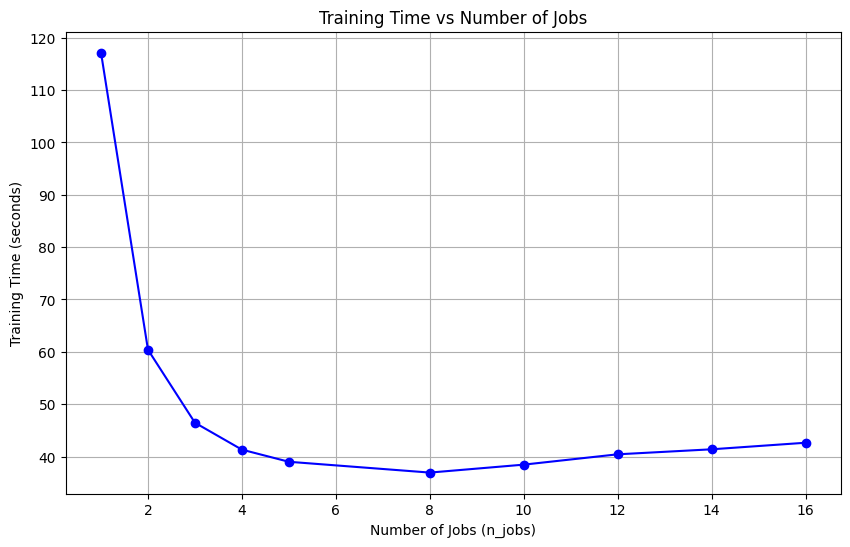

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(n_job_list, training_time_list, marker='o', linestyle='-', color='b')
plt.title('Training Time vs Number of Jobs')
plt.xlabel('Number of Jobs (n_jobs)')
plt.ylabel('Training Time (seconds)')
plt.grid(True)
plt.show()